## Parte 2 . Deep Networks

In [51]:
#Librerias a usar
import pandas as pd
import matplotlib.pyplot as plt

import keras
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD

from keras import backend as K
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
#Carga de los datos utilizados
#
url = 'http://mldata.org/repository/data/download/csv/regression-datasets-housing/'
df = pd.read_csv(url, sep=',',header=None, names=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX',
    'RM', 'AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV'])
df = pd.get_dummies(df,columns=["CHAS"]) #to categorical

df_train,df_test= train_test_split(df,test_size=0.25, random_state=0)
#
#Escalado de los datos
#
scaler =  StandardScaler().fit(df_train)
X_train_scaled = pd.DataFrame(scaler.transform(df_train), columns = df_train.columns)
y_train_scaled = X_train_scaled.pop('MEDV')

scaler =  StandardScaler().fit(df_test)
X_test_scaled = pd.DataFrame(scaler.transform(df_test), columns = df_test.columns)
y_test_scaled = X_test_scaled.pop('MEDV')

y_train_scaled = y_train_scaled.values.reshape(-1,1)
y_test_scaled = y_test_scaled.values.reshape(-1,1)


In [10]:
# Revision de los datos
X_train_scaled.pop('MEDV')
X_test_scaled.pop('MEDV')
X_train_scaled.describe()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,CHAS_0,CHAS_1
count,3.790000e+02,3.790000e+02,3.790000e+02,3.790000e+02,3.790000e+02,3.790000e+02,3.790000e+02,3.790000e+02,3.790000e+02,3.790000e+02,3.790000e+02,3.790000e+02,3.790000e+02,3.790000e+02
mean,4.218262e-17,2.343479e-17,8.436523e-17,7.194480e-16,-7.733480e-16,1.921653e-16,-2.085696e-16,1.335783e-16,1.476392e-16,-5.893849e-16,-2.999653e-16,2.460653e-16,1.839631e-16,5.975871e-17
std,1.001322e+00,1.001322e+00,1.001322e+00,1.001322e+00,1.001322e+00,1.001322e+00,1.001322e+00,1.001322e+00,1.001322e+00,1.001322e+00,1.001322e+00,1.001322e+00,1.001322e+00,1.001322e+00
min,-4.130329e-01,-4.985312e-01,-1.514998e+00,-1.475198e+00,-3.973687e+00,-2.336467e+00,-1.246426e+00,-9.707975e-01,-1.263794e+00,-2.658465e+00,-4.025619e+00,-1.503671e+00,-3.762978e+00,-2.657470e-01
25%,-4.046811e-01,-4.985312e-01,-8.618530e-01,-9.235945e-01,-5.894549e-01,-8.334908e-01,-8.037506e-01,-6.245626e-01,-7.436108e-01,-4.879389e-01,1.944575e-01,-8.127456e-01,2.657470e-01,-2.657470e-01
50%,-3.818337e-01,-4.985312e-01,-3.598727e-01,-1.565211e-01,-1.208466e-01,3.323363e-01,-2.706425e-01,-5.091510e-01,-4.338385e-01,3.802716e-01,3.719387e-01,-1.843784e-01,2.657470e-01,-2.657470e-01
75%,-1.827370e-03,3.430872e-01,1.000608e+00,6.450276e-01,5.246631e-01,8.895201e-01,6.379857e-01,1.683670e+00,1.535846e+00,8.143769e-01,4.171933e-01,6.233235e-01,2.657470e-01,-2.657470e-01
max,1.037470e+01,3.709561e+00,2.375350e+00,2.713540e+00,3.563035e+00,1.109554e+00,3.988486e+00,1.683670e+00,1.798860e+00,1.682587e+00,4.277489e-01,3.396758e+00,2.657470e-01,3.762978e+00


Los datos estan escalados de forma que tiene $\mu=0$ y $\sigma=1$

In [25]:
K.tensorflow_backend._get_available_gpus()

['/job:localhost/replica:0/task:0/device:GPU:0']

**B)**

Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 1s 2ms/step - loss: 1.0308 - val_loss: 1.0470
Epoch 2/300
379/379 [==============================] - 0s 90us/step - loss: 0.9721 - val_loss: 0.9608
Epoch 3/300
379/379 [==============================] - 0s 93us/step - loss: 0.9777 - val_loss: 0.9314
Epoch 4/300
379/379 [==============================] - 0s 90us/step - loss: 0.9057 - val_loss: 0.9079
Epoch 5/300
379/379 [==============================] - 0s 101us/step - loss: 0.8748 - val_loss: 0.9271
Epoch 6/300
379/379 [==============================] - 0s 93us/step - loss: 0.8399 - val_loss: 0.8498
Epoch 7/300
379/379 [==============================] - 0s 93us/step - loss: 0.8013 - val_loss: 0.8771
Epoch 8/300
379/379 [==============================] - 0s 90us/step - loss: 0.7715 - val_loss: 0.7960
Epoch 9/300
379/379 [==============================] - 0s 90us/step - loss: 0.7531 - val_loss: 0.8058
Epoch 10/300
379/379 [==============

379/379 [==============================] - 0s 79us/step - loss: 0.2594 - val_loss: 0.4179
Epoch 81/300
379/379 [==============================] - 0s 85us/step - loss: 0.2598 - val_loss: 0.4265
Epoch 82/300
379/379 [==============================] - 0s 82us/step - loss: 0.2456 - val_loss: 0.4155
Epoch 83/300
379/379 [==============================] - 0s 85us/step - loss: 0.2505 - val_loss: 0.4321
Epoch 84/300
379/379 [==============================] - 0s 77us/step - loss: 0.2543 - val_loss: 0.4149
Epoch 85/300
379/379 [==============================] - 0s 82us/step - loss: 0.2464 - val_loss: 0.4149
Epoch 86/300
379/379 [==============================] - 0s 85us/step - loss: 0.2474 - val_loss: 0.4148
Epoch 87/300
379/379 [==============================] - 0s 79us/step - loss: 0.2504 - val_loss: 0.4169
Epoch 88/300
379/379 [==============================] - 0s 82us/step - loss: 0.2535 - val_loss: 0.4170
Epoch 89/300
379/379 [==============================] - 0s 95us/step - loss: 0.2629 - 

379/379 [==============================] - 0s 90us/step - loss: 0.2446 - val_loss: 0.3965
Epoch 160/300
379/379 [==============================] - 0s 81us/step - loss: 0.2430 - val_loss: 0.3939
Epoch 161/300
379/379 [==============================] - 0s 74us/step - loss: 0.2472 - val_loss: 0.3938
Epoch 162/300
379/379 [==============================] - 0s 93us/step - loss: 0.2492 - val_loss: 0.3957
Epoch 163/300
379/379 [==============================] - 0s 94us/step - loss: 0.2452 - val_loss: 0.3933
Epoch 164/300
379/379 [==============================] - 0s 87us/step - loss: 0.2598 - val_loss: 0.3975
Epoch 165/300
379/379 [==============================] - 0s 77us/step - loss: 0.2494 - val_loss: 0.3933
Epoch 166/300
379/379 [==============================] - 0s 83us/step - loss: 0.2505 - val_loss: 0.4068
Epoch 167/300
379/379 [==============================] - 0s 96us/step - loss: 0.2525 - val_loss: 0.4019
Epoch 168/300
379/379 [==============================] - 0s 82us/step - loss: 

Epoch 238/300
379/379 [==============================] - 0s 87us/step - loss: 0.2417 - val_loss: 0.4265
Epoch 239/300
379/379 [==============================] - 0s 79us/step - loss: 0.2410 - val_loss: 0.3979
Epoch 240/300
379/379 [==============================] - 0s 77us/step - loss: 0.2390 - val_loss: 0.3863
Epoch 241/300
379/379 [==============================] - 0s 87us/step - loss: 0.2396 - val_loss: 0.4086
Epoch 242/300
379/379 [==============================] - 0s 89us/step - loss: 0.2416 - val_loss: 0.3903
Epoch 243/300
379/379 [==============================] - 0s 87us/step - loss: 0.2350 - val_loss: 0.3918
Epoch 244/300
379/379 [==============================] - 0s 95us/step - loss: 0.2417 - val_loss: 0.4054
Epoch 245/300
379/379 [==============================] - 0s 90us/step - loss: 0.2467 - val_loss: 0.3894
Epoch 246/300
379/379 [==============================] - 0s 77us/step - loss: 0.2478 - val_loss: 0.3992
Epoch 247/300
379/379 [==============================] - 0s 74us

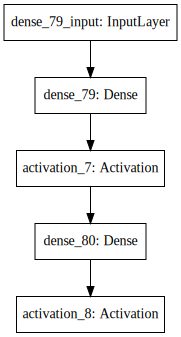

In [58]:
model = Sequential()
model.add(Dense(200, input_dim=X_train_scaled.shape[1], kernel_initializer="uniform"))
model.add(Activation('sigmoid'))
model.add(Dense(1,kernel_initializer = 'uniform'))
model.add(Activation('linear'))

sgd = SGD(lr = 0.01)
model.compile(optimizer = sgd, loss='mean_squared_error')

model_before = keras.models.clone_model(model)
with tf.device('/gpu:0'):
    history = model.fit(pd.DataFrame(X_train_scaled).as_matrix(), pd.DataFrame(y_train_scaled).as_matrix(), epochs = 300,
                verbose=1, validation_data=(pd.DataFrame(X_test_scaled).as_matrix(), pd.DataFrame(y_test_scaled).as_matrix()))
SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [59]:
#obtencion de pesos del modelo entrenado despues de 300 epochs
loss1 = keras.losses.mean_squared_error(model.output,y_train_scaled)
listOfVariableTensors = model.trainable_weights

gradients = K.gradients(loss1, listOfVariableTensors)
sess1 = K.get_session()
evaluated_gradients = sess1.run(gradients,feed_dict={model.input:X_train_scaled.as_matrix()})

#evaluated_gradients = [gradient/len(y_train_scaled) for gradient in evaluated_gradients]
pd.DataFrame(evaluated_gradients[0]).head()
#obtener pesos antes del entrenamiento
#loss_before = keras.losses.mean_squared_error(model_before.output,y_train_scaled)
#listOfVariableTensors_before = model_before.trainable_weights

#gradients_before = K.gradients(loss_before, listOfVariableTensors_before)
#sess_before = K.get_session()
#evaluated_gradients_before = sess_before.run(gradients_before,feed_dict={model_before.input:X_train_scaled.as_matrix()})
#evaluated_gradients_before = [gradient/len(y_train_scaled) for gradient in evaluated_gradients_before]

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,-0.020520,-0.023057,0.150115,0.016332,-0.042747,0.034466,0.009500,-0.032401,-0.022084,0.021329,...,-0.035759,-0.291619,0.015956,0.009911,-0.051073,0.034255,-0.028185,0.003024,0.000481,-0.016080
1,0.057311,-0.010946,0.035283,0.038796,-0.042571,0.029104,-0.035644,-0.025337,-0.012493,0.013197,...,-0.010594,0.003704,-0.046604,0.003961,-0.028667,0.022136,-0.014047,0.003820,0.000243,-0.002021
2,0.122092,-0.040495,-0.147468,0.077706,-0.093353,0.060852,-0.103802,-0.098924,-0.034516,0.082495,...,-0.055701,0.105306,-0.071526,0.016076,-0.087523,0.105092,-0.044845,0.007923,0.000811,-0.027676
3,-0.092713,0.023878,0.140834,-0.062962,0.061141,-0.036575,0.069736,0.049562,0.017572,-0.073526,...,0.022590,-0.184242,0.062944,-0.006479,0.038709,-0.052493,0.019333,-0.004910,-0.000417,0.010106
4,-0.191088,0.057876,0.205780,-0.122960,0.144952,-0.088412,0.148365,0.138097,0.055032,-0.131911,...,0.075280,-0.149945,0.092133,-0.022742,0.127563,-0.157197,0.063924,-0.011133,-0.001107,0.038137


In [16]:
def plot_data(loss,val_loss):
    plt.close('all')

    #f, axarr = plt.subplots(2, sharex=True,figsize=(8,8))
    #f, axarr = plt.subplots(2, sharex=True,figsize=(8,8))
    plt.title('MSE vs Epoch')
    plt.plot(loss)
    plt.plot(val_loss)
    plt.xlabel('epoch')
    plt.ylabel('mse')
    #plt.ylim(ymin=0, ymax=1)

    plt.legend(['entrenamiento', 'prueba'], loc='upper right')
    
    plt.show()

In [13]:
def tensor_of_gradients(model_before,model_after):
    #obtencion de pesos del modelo entrenado despues de 300 epochs
    loss = keras.losses.mean_squared_error(model_after.output,y_train_scaled)
    listOfVariableTensors = model_after.trainable_weights

    gradients = K.gradients(loss, listOfVariableTensors)
    sess1 = K.get_session()
    evaluated_gradients = sess1.run(gradients,feed_dict={model_after.input:X_train_scaled.as_matrix()})
    evaluated_gradients = [gradient/len(y_train_scaled) for gradient in evaluated_gradients]
    
    #obtener pesos antes del entrenamiento
    loss_before = keras.losses.mean_squared_error(model_before.output,y_train_scaled)
    listOfVariableTensors_before = model_before.trainable_weights
    
    gradients_before = K.gradients(loss_before, listOfVariableTensors_before)
    sess_before = K.get_session()
    evaluated_gradients_before = sess_before.run(gradients_before,feed_dict={model_before.input:X_train_scaled.as_matrix()})
    evaluated_gradients_before = [gradient/len(y_train_scaled) for gradient in evaluated_gradients_before]
    return evaluated_gradients_before, evaluated_gradients

In [14]:
def plot_weight_before_and_after(evaluated_gradients_before,evaluated_gradients_after):
    plt.close('all')
    f, axarr = plt.subplots(2, sharey=True,figsize=(8,8))
    
    axarr[0].set_title('Distribución de gradientes de pesos antes de entrenar')
    axarr[1].set_title('Distribución de gradientes de pesos después de entrenar')
    
    axarr[0].hist(evaluated_gradients_before)
    axarr[1].hist(evaluated_gradients_after)
    
    plt.ylabel('Frecuencia')
    plt.xlabel('Valor')
    
    plt.show()
    

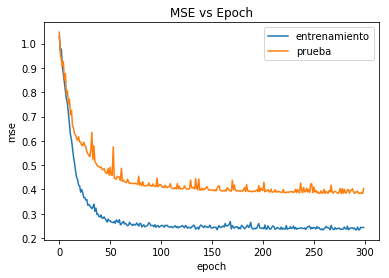

In [60]:
plot_data(history.history['loss'],history.history['val_loss'])

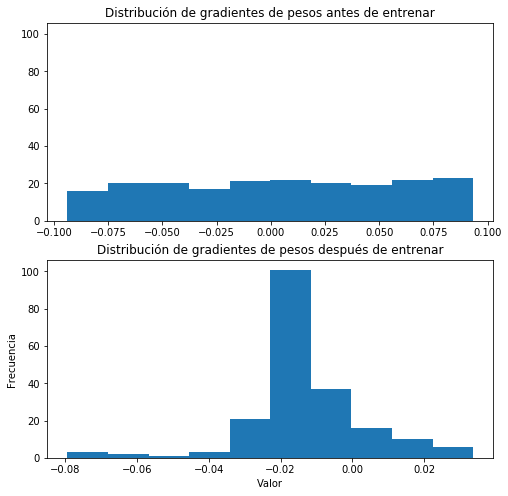

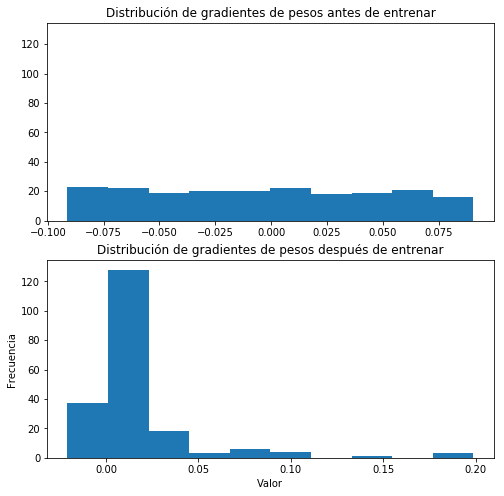

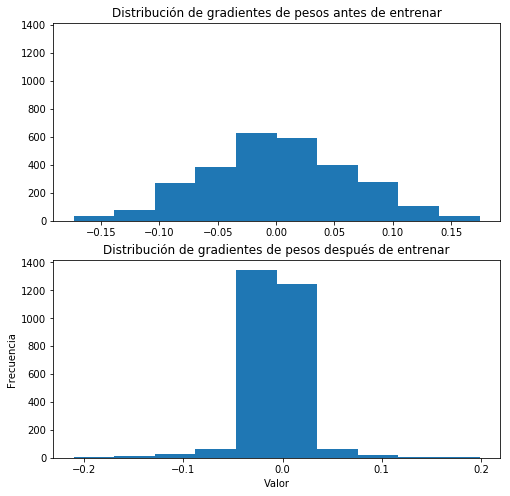

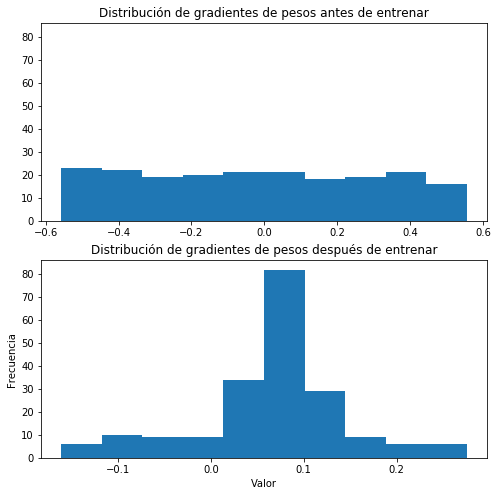

In [21]:
#plt.hist(evaluated_gradients1[1])
#plt.hist(evaluated_gradients2[1])
#plt.title("Histograma despues de entrenar 300 epochs")
#plt.xlabel("Value")
#plt.ylabel("Frequency")
#plt.legend(['Despues', 'Antes'], loc='upper left')
evaluated_gradients_before, evaluated_gradients = tensor_of_gradients(model_before,model)
#print(len(evaluated_gradients_before[0][0]))
#pesos conectados a la primera neurona
plot_weight_before_and_after(evaluated_gradients_before[0][0], evaluated_gradients[0][0])
plot_weight_before_and_after(evaluated_gradients_before[0][1], evaluated_gradients[0][1])
### Pesos de cada capa
plot_weight_before_and_after(evaluated_gradients_before[0].flatten(), evaluated_gradients[0].flatten())
plot_weight_before_and_after(evaluated_gradients_before[1], evaluated_gradients[1])



Se lográ apreciar claramente la distribución uniforme, $-1/\sqrt{N}$ y $1/\sqrt{N}$,( https://github.com/keras-team/keras/blob/master/keras/initializers.py#L49 ) y se ve la reorganización de los pesos luego de 300 epochs. La distribución de campana que se observa en la primera capa es debido a que esta es la suma de todas las neuronas de la capa de entrada, cual a su vez cada una es uniforme.

**C)**

In [22]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

In [23]:
#Modelo profundo a usar
model = Sequential()
model.add(Dense(200, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation='sigmoid'))
model.add(Dense(200, kernel_initializer='uniform',activation='sigmoid'))
model.add(Dense(200,  kernel_initializer='uniform',activation='sigmoid'))
model.add(Dense(200, kernel_initializer='uniform',activation='sigmoid'))

model.add(Dense(1, kernel_initializer='uniform',activation='linear'))
sgd = SGD(lr=0.01)
model.compile(optimizer=sgd,loss='mean_squared_error')

model_before = keras.models.clone_model(model)
with tf.device('/gpu:0'):
    history = model.fit(pd.DataFrame(X_train_scaled).as_matrix(), pd.DataFrame(y_train_scaled).as_matrix(), epochs = 300,
                verbose=1, validation_data=(pd.DataFrame(X_test_scaled).as_matrix(), pd.DataFrame(y_test_scaled).as_matrix()))


Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 0s 924us/step - loss: 154.2948 - val_loss: 88.7261
Epoch 2/300
379/379 [==============================] - 0s 107us/step - loss: 93.0201 - val_loss: 187.5726
Epoch 3/300
379/379 [==============================] - 0s 119us/step - loss: 101.1298 - val_loss: 83.1286
Epoch 4/300
379/379 [==============================] - 0s 120us/step - loss: 88.2307 - val_loss: 116.2379
Epoch 5/300
379/379 [==============================] - 0s 108us/step - loss: 88.4210 - val_loss: 86.1466
Epoch 6/300
379/379 [==============================] - 0s 105us/step - loss: 91.4723 - val_loss: 81.9678
Epoch 7/300
379/379 [==============================] - 0s 111us/step - loss: 89.4524 - val_loss: 85.3151
Epoch 8/300
379/379 [==============================] - 0s 106us/step - loss: 91.1895 - val_loss: 86.0901
Epoch 9/300
379/379 [==============================] - 0s 102us/step - loss: 86.7996 - val_loss: 91.0522
Epoch

379/379 [==============================] - 0s 114us/step - loss: 11.8480 - val_loss: 23.3823
Epoch 156/300
379/379 [==============================] - 0s 91us/step - loss: 11.5951 - val_loss: 21.7314
Epoch 157/300
379/379 [==============================] - 0s 95us/step - loss: 13.5196 - val_loss: 24.7298
Epoch 158/300
379/379 [==============================] - 0s 99us/step - loss: 12.2922 - val_loss: 22.2929
Epoch 159/300
379/379 [==============================] - 0s 107us/step - loss: 11.1696 - val_loss: 22.5243
Epoch 160/300
379/379 [==============================] - 0s 94us/step - loss: 11.2973 - val_loss: 23.5124
Epoch 161/300
379/379 [==============================] - 0s 97us/step - loss: 12.0196 - val_loss: 23.5793
Epoch 162/300
379/379 [==============================] - 0s 95us/step - loss: 10.7558 - val_loss: 22.5634
Epoch 163/300
379/379 [==============================] - 0s 91us/step - loss: 11.5557 - val_loss: 28.1355
Epoch 164/300
379/379 [==============================] - 0

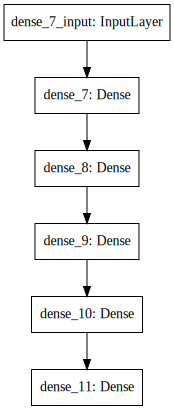

In [24]:
SVG(model_to_dot(model).create(prog='dot', format='svg'))

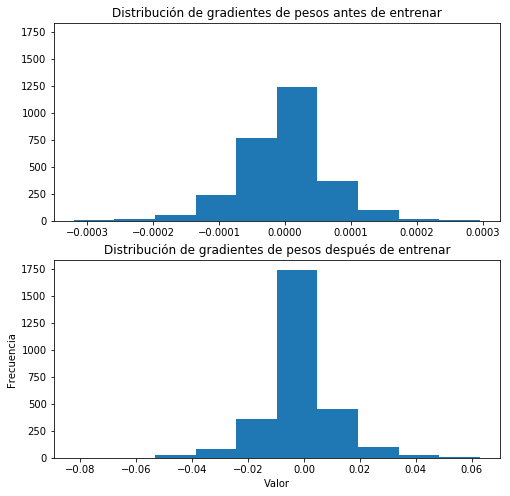

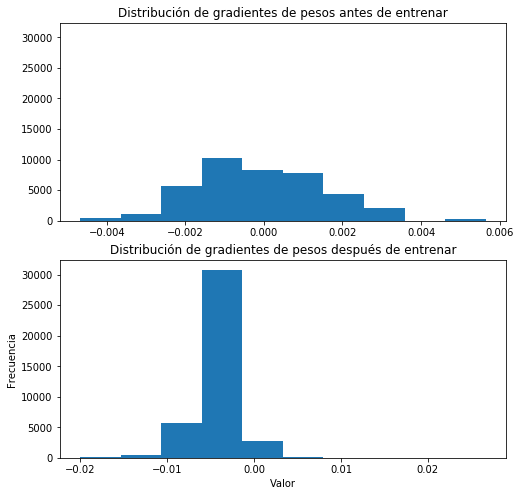

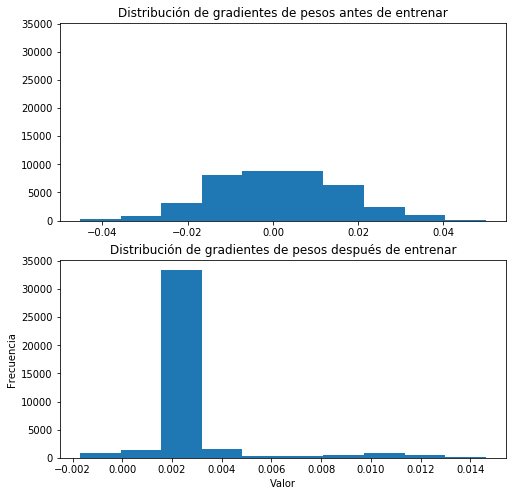

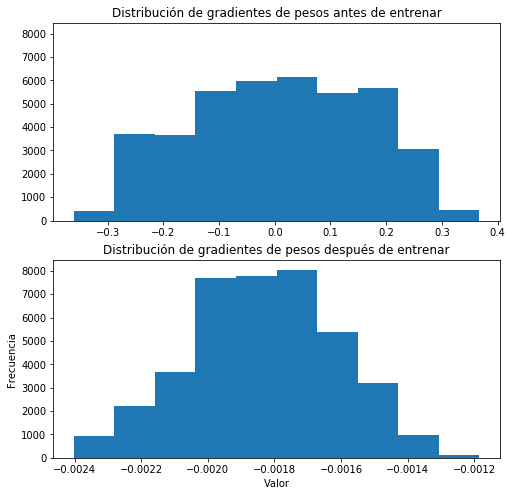

In [25]:
evaluated_gradients_before, evaluated_gradients = tensor_of_gradients(model_before,model)

plot_weight_before_and_after(evaluated_gradients_before[0].flatten(), evaluated_gradients[0].flatten())
plot_weight_before_and_after(evaluated_gradients_before[2].flatten(), evaluated_gradients[2].flatten())
plot_weight_before_and_after(evaluated_gradients_before[4].flatten(), evaluated_gradients[4].flatten())
plot_weight_before_and_after(evaluated_gradients_before[6].flatten(), evaluated_gradients[6].flatten())

In [26]:
#pd.DataFrame(evaluated_gradients[2]).describe()

Se espera que para redes profunda la función de activación sigmoidal se obtenga un efecto de desvanicimiento del gradiente. Como heuristica intuitiva pensar que la red aprende más rapido cuando la magnitud es mayor. Haciendo referencia a que esa conexión tiene un peso más grande debido al impacto que genera al resultado final. (**Entonces de esto si la red en las primeras capas no presenta una suma de pesos donde se note una preferencia se dira que se presencia un desvanecimiento, y si existe un valor muy grande se esta en presencia de una explosion del gradiente ** discutir?)

**D)**

In [27]:
model = Sequential()
model.add(Dense(200, input_dim=X_train_scaled.shape[1], kernel_initializer='glorot_uniform',activation='sigmoid'))
model.add(Dense(200, kernel_initializer='glorot_uniform',activation='sigmoid'))
model.add(Dense(200,  kernel_initializer='glorot_uniform',activation='sigmoid'))
model.add(Dense(200, kernel_initializer='glorot_uniform',activation='sigmoid'))
model.add(Dense(1, kernel_initializer='glorot_uniform',activation='linear'))
sgd = SGD(lr=0.01)
model.compile(optimizer=sgd,loss='mean_squared_error')

model_before = keras.models.clone_model(model)
with tf.device('/gpu:0'):
    history = model.fit(pd.DataFrame(X_train_scaled).as_matrix(), pd.DataFrame(y_train_scaled).as_matrix(), epochs = 300,
                verbose=1, validation_data=(pd.DataFrame(X_test_scaled).as_matrix(), pd.DataFrame(y_test_scaled).as_matrix()))


Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 0s 958us/step - loss: 143.5582 - val_loss: 98.9267
Epoch 2/300
379/379 [==============================] - 0s 124us/step - loss: 101.5526 - val_loss: 91.0820
Epoch 3/300
379/379 [==============================] - 0s 110us/step - loss: 91.2073 - val_loss: 87.2263
Epoch 4/300
379/379 [==============================] - 0s 105us/step - loss: 99.4776 - val_loss: 86.8400
Epoch 5/300
379/379 [==============================] - 0s 112us/step - loss: 89.5393 - val_loss: 85.9729
Epoch 6/300
379/379 [==============================] - 0s 94us/step - loss: 91.0758 - val_loss: 97.4749
Epoch 7/300
379/379 [==============================] - 0s 108us/step - loss: 86.6045 - val_loss: 97.2168
Epoch 8/300
379/379 [==============================] - 0s 101us/step - loss: 92.9875 - val_loss: 81.7988
Epoch 9/300
379/379 [==============================] - 0s 102us/step - loss: 88.4319 - val_loss: 81.0486
Epoch 10

379/379 [==============================] - 0s 97us/step - loss: 10.0015 - val_loss: 24.2521
Epoch 156/300
379/379 [==============================] - 0s 94us/step - loss: 10.3561 - val_loss: 24.8661
Epoch 157/300
379/379 [==============================] - 0s 83us/step - loss: 10.6922 - val_loss: 21.0933
Epoch 158/300
379/379 [==============================] - 0s 101us/step - loss: 10.1189 - val_loss: 21.0695
Epoch 159/300
379/379 [==============================] - 0s 98us/step - loss: 11.0892 - val_loss: 23.3384
Epoch 160/300
379/379 [==============================] - 0s 91us/step - loss: 10.0965 - val_loss: 21.9770
Epoch 161/300
379/379 [==============================] - 0s 94us/step - loss: 11.8044 - val_loss: 20.3932
Epoch 162/300
379/379 [==============================] - 0s 95us/step - loss: 10.8977 - val_loss: 21.0617
Epoch 163/300
379/379 [==============================] - 0s 94us/step - loss: 10.4591 - val_loss: 21.8167
Epoch 164/300
379/379 [==============================] - 0s

Epoch 233/300
379/379 [==============================] - 0s 101us/step - loss: 7.9439 - val_loss: 21.4119
Epoch 234/300
379/379 [==============================] - 0s 97us/step - loss: 9.2719 - val_loss: 19.2160
Epoch 235/300
379/379 [==============================] - 0s 108us/step - loss: 8.0872 - val_loss: 20.3447
Epoch 236/300
379/379 [==============================] - 0s 93us/step - loss: 8.1181 - val_loss: 18.9610
Epoch 237/300
379/379 [==============================] - 0s 83us/step - loss: 8.8828 - val_loss: 20.9480
Epoch 238/300
379/379 [==============================] - 0s 95us/step - loss: 9.0505 - val_loss: 19.2081
Epoch 239/300
379/379 [==============================] - 0s 94us/step - loss: 8.8892 - val_loss: 18.9052
Epoch 240/300
379/379 [==============================] - 0s 103us/step - loss: 8.3806 - val_loss: 19.7026
Epoch 241/300
379/379 [==============================] - 0s 97us/step - loss: 8.3264 - val_loss: 19.7208
Epoch 242/300
379/379 [=============================

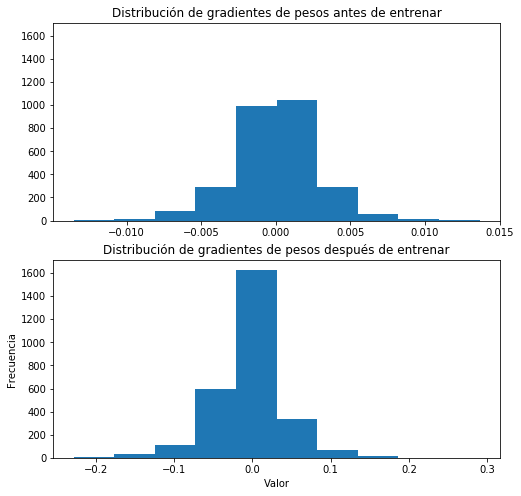

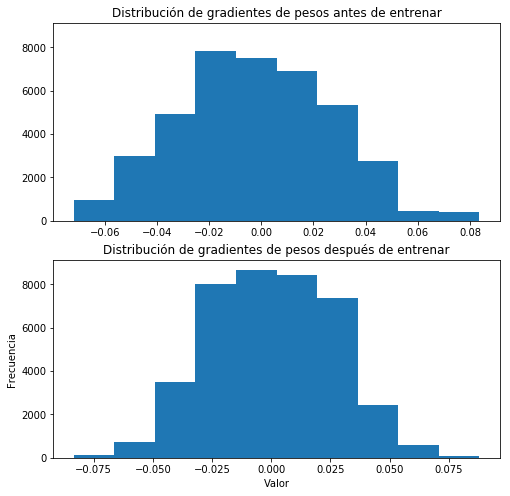

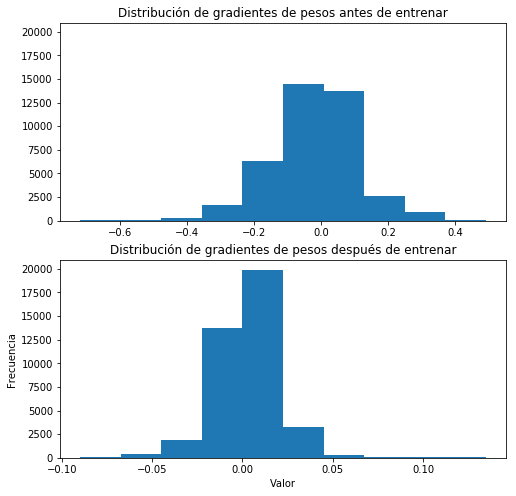

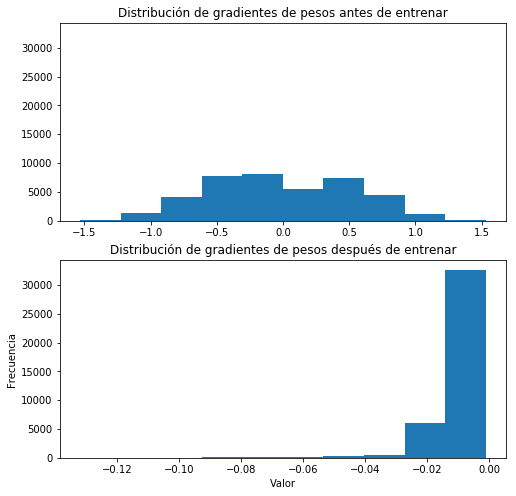

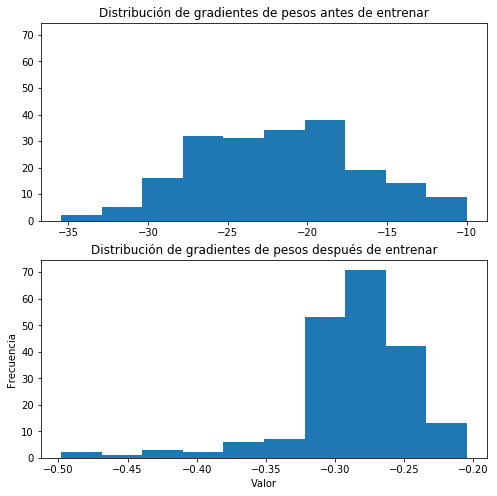

In [28]:
evaluated_gradients_before, evaluated_gradients = tensor_of_gradients(model_before,model)
#Si se quita el .flatten() se observa el comportamiento por neurona pero es dificil de obtener una vista particular
plot_weight_before_and_after(evaluated_gradients_before[0].flatten(), evaluated_gradients[0].flatten())
plot_weight_before_and_after(evaluated_gradients_before[2].flatten(), evaluated_gradients[2].flatten())
plot_weight_before_and_after(evaluated_gradients_before[4].flatten(), evaluated_gradients[4].flatten())
plot_weight_before_and_after(evaluated_gradients_before[6].flatten(), evaluated_gradients[6].flatten())
#pesos de la capa de salida
plot_weight_before_and_after(evaluated_gradients_before[8], evaluated_gradients[8])

**E)**

In [29]:
model = Sequential()
model.add(Dense(200, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation='relu'))
model.add(Dense(200, kernel_initializer='uniform',activation='relu'))
model.add(Dense(200,  kernel_initializer='uniform',activation='relu'))
model.add(Dense(200, kernel_initializer='uniform',activation='relu'))
model.add(Dense(1, kernel_initializer='uniform',activation='linear'))
sgd = SGD(lr=0.01)
model.compile(optimizer=sgd,loss='mean_squared_error')

model_before = keras.models.clone_model(model)
with tf.device('/gpu:0'):
    history = model.fit(pd.DataFrame(X_train_scaled).as_matrix(), pd.DataFrame(y_train_scaled).as_matrix(), epochs = 300,
                verbose=1, validation_data=(pd.DataFrame(X_test_scaled).as_matrix(), pd.DataFrame(y_test_scaled).as_matrix()))


Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 0s 1ms/step - loss: 524.9436 - val_loss: 447.9543
Epoch 2/300
379/379 [==============================] - 0s 119us/step - loss: 501.0084 - val_loss: 335.3693
Epoch 3/300
379/379 [==============================] - 0s 110us/step - loss: 296.8875 - val_loss: 219.1346
Epoch 4/300
379/379 [==============================] - 0s 106us/step - loss: 128.3632 - val_loss: 111.7138
Epoch 5/300
379/379 [==============================] - 0s 108us/step - loss: 103.4981 - val_loss: 84.6913
Epoch 6/300
379/379 [==============================] - 0s 106us/step - loss: 77.7351 - val_loss: 91.2797
Epoch 7/300
379/379 [==============================] - 0s 107us/step - loss: 122.2823 - val_loss: 82.9278
Epoch 8/300
379/379 [==============================] - 0s 101us/step - loss: 164.8715 - val_loss: 81.4447
Epoch 9/300
379/379 [==============================] - 0s 100us/step - loss: 104.0726 - val_loss: 182.156

379/379 [==============================] - 0s 94us/step - loss: nan - val_loss: nan
Epoch 167/300
379/379 [==============================] - 0s 86us/step - loss: nan - val_loss: nan
Epoch 168/300
379/379 [==============================] - 0s 102us/step - loss: nan - val_loss: nan
Epoch 169/300
379/379 [==============================] - 0s 93us/step - loss: nan - val_loss: nan
Epoch 170/300
379/379 [==============================] - 0s 99us/step - loss: nan - val_loss: nan
Epoch 171/300
379/379 [==============================] - 0s 107us/step - loss: nan - val_loss: nan
Epoch 172/300
379/379 [==============================] - 0s 94us/step - loss: nan - val_loss: nan
Epoch 173/300
379/379 [==============================] - 0s 98us/step - loss: nan - val_loss: nan
Epoch 174/300
379/379 [==============================] - 0s 83us/step - loss: nan - val_loss: nan
Epoch 175/300
379/379 [==============================] - 0s 94us/step - loss: nan - val_loss: nan
Epoch 176/300
379/379 [=========

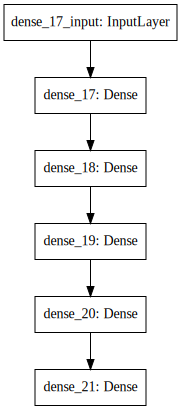

In [30]:
SVG(model_to_dot(model).create(prog='dot', format='svg'))

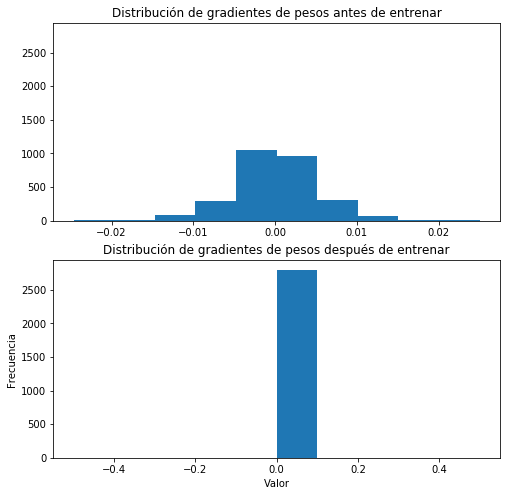

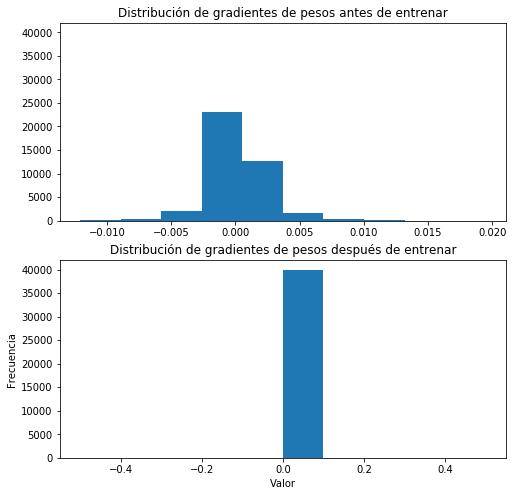

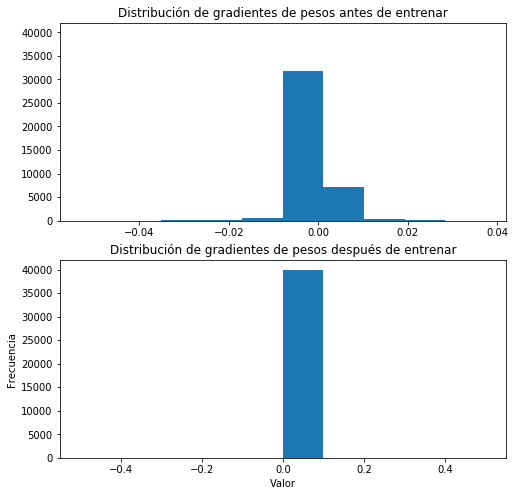

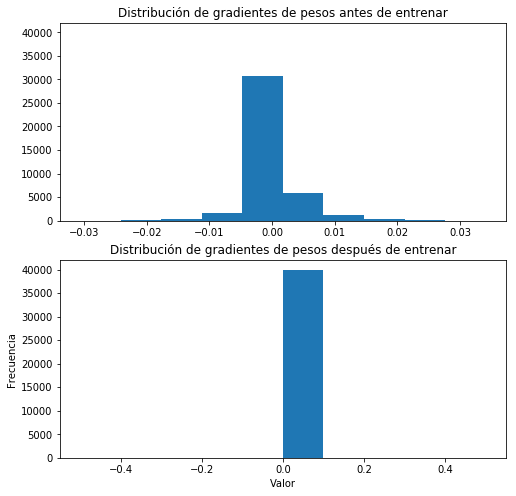

c:\users\caimapo\appdata\local\programs\python\python36\lib\site-packages\matplotlib\axes\_axes.py:6193: RuntimeWarning: invalid value encountered in less
  xmin = min(xmin, xi.min())
c:\users\caimapo\appdata\local\programs\python\python36\lib\site-packages\matplotlib\axes\_axes.py:6194: RuntimeWarning: invalid value encountered in greater
  xmax = max(xmax, xi.max())


ValueError: max must be larger than min in range parameter.

In [31]:
evaluated_gradients_before, evaluated_gradients = tensor_of_gradients(model_before,model)
#Si se quita el .flatten() se observa el comportamiento por neurona pero es dificil de obtener una vista particular
plot_weight_before_and_after(evaluated_gradients_before[0].flatten(), evaluated_gradients[0].flatten())
plot_weight_before_and_after(evaluated_gradients_before[2].flatten(), evaluated_gradients[2].flatten())
plot_weight_before_and_after(evaluated_gradients_before[4].flatten(), evaluated_gradients[4].flatten())
plot_weight_before_and_after(evaluated_gradients_before[6].flatten(), evaluated_gradients[6].flatten())
#pesos de la capa de salida
plot_weight_before_and_after(evaluated_gradients_before[8], evaluated_gradients[8])

In [32]:
model = Sequential()
model.add(Dense(200, input_dim=X_train_scaled.shape[1], kernel_initializer='he_uniform',activation='relu'))
model.add(Dense(200, kernel_initializer='he_uniform',activation='relu'))
model.add(Dense(200,  kernel_initializer='he_uniform',activation='relu'))
model.add(Dense(200, kernel_initializer='he_uniform',activation='relu'))
model.add(Dense(1, kernel_initializer='he_uniform',activation='linear'))
sgd = SGD(lr=0.01)
model.compile(optimizer=sgd,loss='mean_squared_error')

model_before = keras.models.clone_model(model)
with tf.device('/gpu:0'):
    history = model.fit(pd.DataFrame(X_train_scaled).as_matrix(), pd.DataFrame(y_train_scaled).as_matrix(), epochs = 300,
                verbose=1, validation_data=(pd.DataFrame(X_test_scaled).as_matrix(), pd.DataFrame(y_test_scaled).as_matrix()))


Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 2/300
379/379 [==============================] - 0s 103us/step - loss: nan - val_loss: nan
Epoch 3/300
379/379 [==============================] - 0s 112us/step - loss: nan - val_loss: nan
Epoch 4/300
379/379 [==============================] - 0s 117us/step - loss: nan - val_loss: nan
Epoch 5/300
379/379 [==============================] - 0s 102us/step - loss: nan - val_loss: nan
Epoch 6/300
379/379 [==============================] - 0s 112us/step - loss: nan - val_loss: nan
Epoch 7/300
379/379 [==============================] - 0s 103us/step - loss: nan - val_loss: nan
Epoch 8/300
379/379 [==============================] - 0s 106us/step - loss: nan - val_loss: nan
Epoch 9/300
379/379 [==============================] - 0s 107us/step - loss: nan - val_loss: nan
Epoch 10/300
379/379 [==============================] - 0s 98us/step - loss: nan - 

379/379 [==============================] - 0s 104us/step - loss: nan - val_loss: nan
Epoch 168/300
379/379 [==============================] - 0s 98us/step - loss: nan - val_loss: nan
Epoch 169/300
379/379 [==============================] - 0s 103us/step - loss: nan - val_loss: nan
Epoch 170/300
379/379 [==============================] - 0s 97us/step - loss: nan - val_loss: nan
Epoch 171/300
379/379 [==============================] - 0s 94us/step - loss: nan - val_loss: nan
Epoch 172/300
379/379 [==============================] - 0s 91us/step - loss: nan - val_loss: nan
Epoch 173/300
379/379 [==============================] - 0s 97us/step - loss: nan - val_loss: nan
Epoch 174/300
379/379 [==============================] - 0s 95us/step - loss: nan - val_loss: nan
Epoch 175/300
379/379 [==============================] - 0s 97us/step - loss: nan - val_loss: nan
Epoch 176/300
379/379 [==============================] - 0s 91us/step - loss: nan - val_loss: nan
Epoch 177/300
379/379 [=========

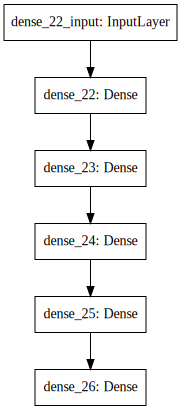

In [33]:
SVG(model_to_dot(model).create(prog='dot', format='svg'))

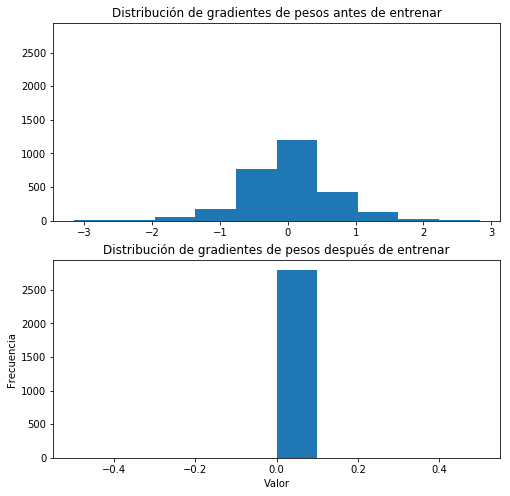

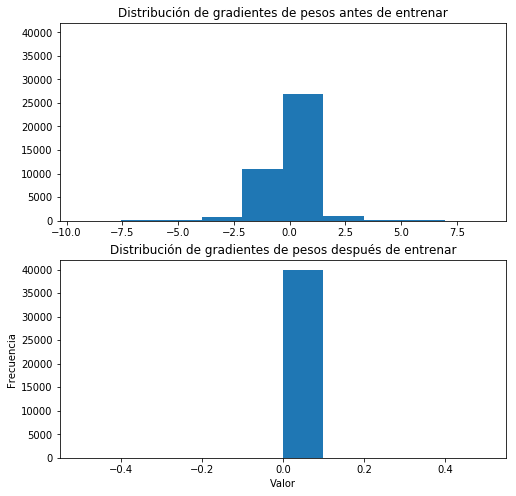

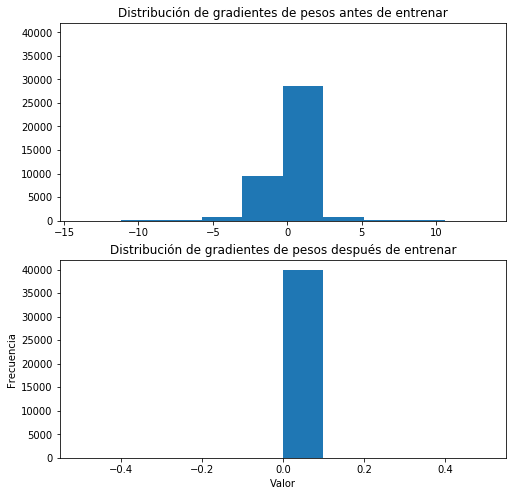

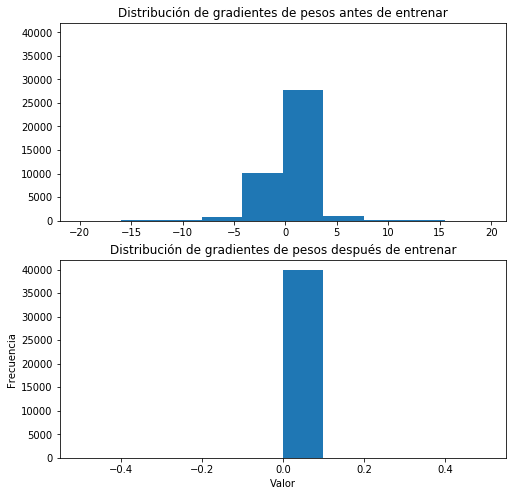

c:\users\caimapo\appdata\local\programs\python\python36\lib\site-packages\matplotlib\axes\_axes.py:6193: RuntimeWarning: invalid value encountered in less
  xmin = min(xmin, xi.min())
c:\users\caimapo\appdata\local\programs\python\python36\lib\site-packages\matplotlib\axes\_axes.py:6194: RuntimeWarning: invalid value encountered in greater
  xmax = max(xmax, xi.max())


ValueError: max must be larger than min in range parameter.

In [34]:
evaluated_gradients_before, evaluated_gradients = tensor_of_gradients(model_before,model)
#Si se quita el .flatten() se observa el comportamiento por neurona pero es dificil de obtener una vista particular
plot_weight_before_and_after(evaluated_gradients_before[0].flatten(), evaluated_gradients[0].flatten())
plot_weight_before_and_after(evaluated_gradients_before[2].flatten(), evaluated_gradients[2].flatten())
plot_weight_before_and_after(evaluated_gradients_before[4].flatten(), evaluated_gradients[4].flatten())
plot_weight_before_and_after(evaluated_gradients_before[6].flatten(), evaluated_gradients[6].flatten())
#pesos de la capa de salida
plot_weight_before_and_after(evaluated_gradients_before[8], evaluated_gradients[8])

https://en.wikipedia.org/wiki/Vanishing_gradient_problem

Con la configuración de he_uniform como inicializador, y relu como activador de las capas ocultas, el modelo divergio.

**F)**¿Qué es lo que sucede con la red más profunda? ¿El modelo logra convergencia en su entrenamiento? Modifique aspectos estructurales (funciones de activación, inicializadores, regularización, momentum, variación de tasa de aprendizaje, entre otros) de la red profunda de 6 capas definida anteriormente (no modifique la profundidad ni el número de neuronas) para lograr un error cuadrático medio (mse) similar o menor al de una red no profunda, como la definida en b) en esta sección, sobre el conjunto de pruebas.

In [84]:
model = Sequential()
model.add(Dense(200, input_dim=X_train_scaled.shape[1], kernel_initializer='glorot_uniform',activation='sigmoid'))
model.add(Dense(200, kernel_initializer='glorot_uniform',activation='sigmoid'))
model.add(Dense(200,  kernel_initializer='glorot_uniform',activation='sigmoid'))
model.add(Dense(200, kernel_initializer='glorot_uniform',activation='sigmoid'))
model.add(Dense(1, kernel_initializer='glorot_uniform',activation='linear'))
#con momentum se logro estabilizar el modelo de forma similar al modelo b.
sgd = SGD(lr=0.0001,momentum=0.1)
model.compile(optimizer=sgd,loss='mean_squared_error')

model_before = keras.models.clone_model(model)
with tf.device('/gpu:0'):
    history = model.fit(pd.DataFrame(X_train_scaled).as_matrix(), pd.DataFrame(y_train_scaled).as_matrix(), epochs = 300,
                verbose=1, validation_data=(pd.DataFrame(X_test_scaled).as_matrix(), pd.DataFrame(y_test_scaled).as_matrix()))


Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 1s 2ms/step - loss: 1.4232 - val_loss: 1.3547
Epoch 2/300
379/379 [==============================] - 0s 108us/step - loss: 1.3083 - val_loss: 1.2579
Epoch 3/300
379/379 [==============================] - 0s 116us/step - loss: 1.2237 - val_loss: 1.1866
Epoch 4/300
379/379 [==============================] - 0s 103us/step - loss: 1.1620 - val_loss: 1.1362
Epoch 5/300
379/379 [==============================] - 0s 106us/step - loss: 1.1184 - val_loss: 1.0995
Epoch 6/300
379/379 [==============================] - 0s 115us/step - loss: 1.0866 - val_loss: 1.0727
Epoch 7/300
379/379 [==============================] - 0s 114us/step - loss: 1.0634 - val_loss: 1.0531
Epoch 8/300
379/379 [==============================] - 0s 108us/step - loss: 1.0464 - val_loss: 1.0390
Epoch 9/300
379/379 [==============================] - 0s 109us/step - loss: 1.0335 - val_loss: 1.0285
Epoch 10/300
379/379 [=======

379/379 [==============================] - 0s 114us/step - loss: 0.9995 - val_loss: 0.9996
Epoch 80/300
379/379 [==============================] - 0s 105us/step - loss: 0.9993 - val_loss: 0.9996
Epoch 81/300
379/379 [==============================] - 0s 119us/step - loss: 0.9993 - val_loss: 0.9996
Epoch 82/300
379/379 [==============================] - 0s 116us/step - loss: 0.9993 - val_loss: 0.9996
Epoch 83/300
379/379 [==============================] - 0s 108us/step - loss: 0.9992 - val_loss: 0.9996
Epoch 84/300
379/379 [==============================] - 0s 105us/step - loss: 0.9993 - val_loss: 0.9996
Epoch 85/300
379/379 [==============================] - 0s 121us/step - loss: 0.9991 - val_loss: 0.9996
Epoch 86/300
379/379 [==============================] - 0s 116us/step - loss: 0.9995 - val_loss: 0.9996
Epoch 87/300
379/379 [==============================] - 0s 111us/step - loss: 0.9992 - val_loss: 0.9996
Epoch 88/300
379/379 [==============================] - 0s 103us/step - loss:

379/379 [==============================] - 0s 101us/step - loss: 0.9991 - val_loss: 0.9995
Epoch 158/300
379/379 [==============================] - 0s 107us/step - loss: 0.9992 - val_loss: 0.9995
Epoch 159/300
379/379 [==============================] - 0s 95us/step - loss: 0.9991 - val_loss: 0.9995
Epoch 160/300
379/379 [==============================] - 0s 104us/step - loss: 0.9992 - val_loss: 0.9995
Epoch 161/300
379/379 [==============================] - 0s 97us/step - loss: 0.9990 - val_loss: 0.9995
Epoch 162/300
379/379 [==============================] - 0s 91us/step - loss: 0.9992 - val_loss: 0.9995
Epoch 163/300
379/379 [==============================] - 0s 102us/step - loss: 0.9992 - val_loss: 0.9995
Epoch 164/300
379/379 [==============================] - 0s 108us/step - loss: 0.9993 - val_loss: 0.9995
Epoch 165/300
379/379 [==============================] - 0s 102us/step - loss: 0.9991 - val_loss: 0.9995
Epoch 166/300
379/379 [==============================] - 0s 116us/step -

379/379 [==============================] - 0s 110us/step - loss: 0.9990 - val_loss: 0.9993
Epoch 236/300
379/379 [==============================] - 0s 103us/step - loss: 0.9989 - val_loss: 0.9993
Epoch 237/300
379/379 [==============================] - 0s 107us/step - loss: 0.9991 - val_loss: 0.9993
Epoch 238/300
379/379 [==============================] - 0s 107us/step - loss: 0.9989 - val_loss: 0.9993
Epoch 239/300
379/379 [==============================] - 0s 95us/step - loss: 0.9989 - val_loss: 0.9993
Epoch 240/300
379/379 [==============================] - 0s 102us/step - loss: 0.9989 - val_loss: 0.9993
Epoch 241/300
379/379 [==============================] - 0s 103us/step - loss: 0.9989 - val_loss: 0.9993
Epoch 242/300
379/379 [==============================] - 0s 101us/step - loss: 0.9993 - val_loss: 0.9993
Epoch 243/300
379/379 [==============================] - 0s 101us/step - loss: 0.9993 - val_loss: 0.9993
Epoch 244/300
379/379 [==============================] - 0s 90us/step 

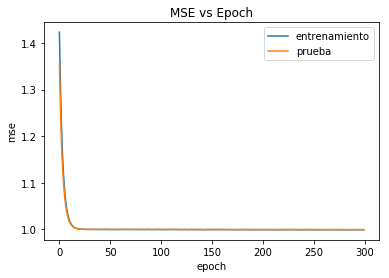

In [85]:
plot_data(history.history['loss'],history.history['val_loss'])

Con una arquitectura de 6 capas,5 ocultas con activación *sigmoid* de 200 neuronas cada una y salida *linear*, optimizador sgd con learning rate de 0.01, al igual que en la redes anteriores, antes de probar se observa que el mse es diferente al de la red ff de 3 capas que se trabaja en la parte b), la diferencia se nota en la convergencia, en la red ff esta es monotona en cambio en la red profunda esta es decreciente pero inestable. Dado esta situación se probo con un lr más bajo y decay pero no lograron cambiar esta situación, lo ultimo que se probo fue agregarle momentum al sgd, lo que logro hacerlo más parecido al caso de la red ff.

**G)**

In [81]:
model = Sequential()
sgd = SGD(lr=0.001,momentum=0.1)
model.add(Dense(1000, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation='sigmoid'))
model.add(Dense(1, kernel_initializer='uniform',activation='linear'))
model.compile(optimizer=sgd,loss='mean_squared_error')

model_before = keras.models.clone_model(model)
with tf.device('/gpu:0'):
    history = model.fit(pd.DataFrame(X_train_scaled).as_matrix(), pd.DataFrame(y_train_scaled).as_matrix(), epochs = 300,
                verbose=1, validation_data=(pd.DataFrame(X_test_scaled).as_matrix(), pd.DataFrame(y_test_scaled).as_matrix()))


Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 1s 2ms/step - loss: 0.9612 - val_loss: 0.9646
Epoch 2/300
379/379 [==============================] - 0s 98us/step - loss: 0.9494 - val_loss: 0.9779
Epoch 3/300
379/379 [==============================] - 0s 102us/step - loss: 0.9245 - val_loss: 0.9391
Epoch 4/300
379/379 [==============================] - 0s 101us/step - loss: 0.9130 - val_loss: 0.9390
Epoch 5/300
379/379 [==============================] - 0s 101us/step - loss: 0.9028 - val_loss: 0.9213
Epoch 6/300
379/379 [==============================] - 0s 95us/step - loss: 0.8942 - val_loss: 0.9117
Epoch 7/300
379/379 [==============================] - 0s 93us/step - loss: 0.8804 - val_loss: 0.9020
Epoch 8/300
379/379 [==============================] - 0s 103us/step - loss: 0.8806 - val_loss: 0.9074
Epoch 9/300
379/379 [==============================] - 0s 93us/step - loss: 0.8684 - val_loss: 0.8881
Epoch 10/300
379/379 [===========

379/379 [==============================] - 0s 102us/step - loss: 0.4297 - val_loss: 0.6073
Epoch 81/300
379/379 [==============================] - 0s 90us/step - loss: 0.4230 - val_loss: 0.5965
Epoch 82/300
379/379 [==============================] - 0s 79us/step - loss: 0.4208 - val_loss: 0.5967
Epoch 83/300
379/379 [==============================] - 0s 76us/step - loss: 0.4119 - val_loss: 0.6238
Epoch 84/300
379/379 [==============================] - 0s 85us/step - loss: 0.4210 - val_loss: 0.6004
Epoch 85/300
379/379 [==============================] - 0s 101us/step - loss: 0.4227 - val_loss: 0.5952
Epoch 86/300
379/379 [==============================] - 0s 84us/step - loss: 0.4214 - val_loss: 0.5909
Epoch 87/300
379/379 [==============================] - 0s 77us/step - loss: 0.4084 - val_loss: 0.6008
Epoch 88/300
379/379 [==============================] - 0s 82us/step - loss: 0.4049 - val_loss: 0.6125
Epoch 89/300
379/379 [==============================] - 0s 95us/step - loss: 0.4084 

379/379 [==============================] - 0s 90us/step - loss: 0.3180 - val_loss: 0.5222
Epoch 160/300
379/379 [==============================] - 0s 87us/step - loss: 0.3162 - val_loss: 0.5217
Epoch 161/300
379/379 [==============================] - 0s 82us/step - loss: 0.3160 - val_loss: 0.5226
Epoch 162/300
379/379 [==============================] - 0s 89us/step - loss: 0.3131 - val_loss: 0.5201
Epoch 163/300
379/379 [==============================] - 0s 77us/step - loss: 0.3189 - val_loss: 0.5234
Epoch 164/300
379/379 [==============================] - 0s 95us/step - loss: 0.3173 - val_loss: 0.5234
Epoch 165/300
379/379 [==============================] - 0s 104us/step - loss: 0.3176 - val_loss: 0.5175
Epoch 166/300
379/379 [==============================] - 0s 85us/step - loss: 0.3121 - val_loss: 0.5170
Epoch 167/300
379/379 [==============================] - 0s 87us/step - loss: 0.3201 - val_loss: 0.5165
Epoch 168/300
379/379 [==============================] - 0s 84us/step - loss:

Epoch 238/300
379/379 [==============================] - 0s 82us/step - loss: 0.2761 - val_loss: 0.4888
Epoch 239/300
379/379 [==============================] - 0s 79us/step - loss: 0.2773 - val_loss: 0.4754
Epoch 240/300
379/379 [==============================] - 0s 108us/step - loss: 0.2768 - val_loss: 0.4759
Epoch 241/300
379/379 [==============================] - 0s 90us/step - loss: 0.2709 - val_loss: 0.4811
Epoch 242/300
379/379 [==============================] - 0s 107us/step - loss: 0.2737 - val_loss: 0.4731
Epoch 243/300
379/379 [==============================] - 0s 99us/step - loss: 0.2767 - val_loss: 0.4710
Epoch 244/300
379/379 [==============================] - 0s 85us/step - loss: 0.2741 - val_loss: 0.4703
Epoch 245/300
379/379 [==============================] - 0s 90us/step - loss: 0.2734 - val_loss: 0.4708
Epoch 246/300
379/379 [==============================] - 0s 101us/step - loss: 0.2745 - val_loss: 0.4690
Epoch 247/300
379/379 [==============================] - 0s 1

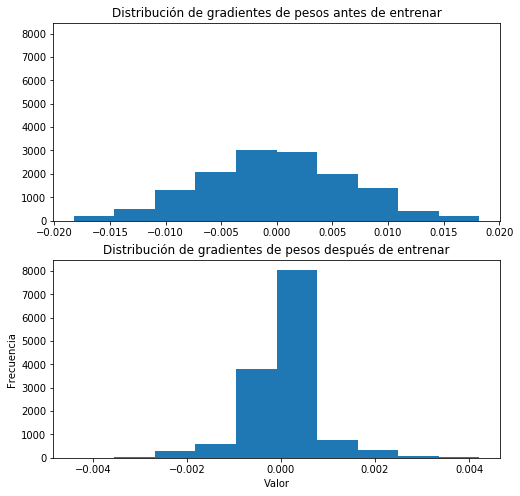

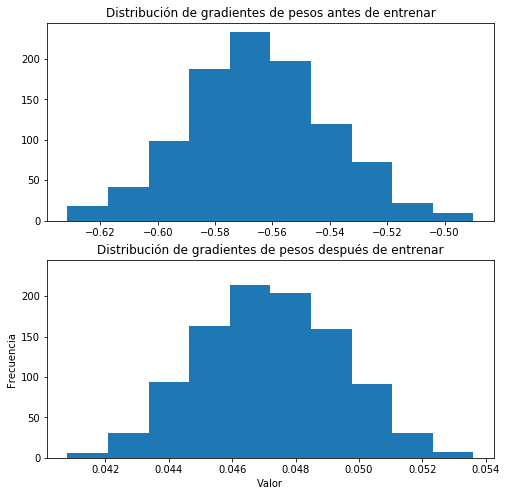

In [82]:
evaluated_gradients_before, evaluated_gradients = tensor_of_gradients(model_before,model)
plot_weight_before_and_after(evaluated_gradients_before[0].flatten(), evaluated_gradients[0].flatten())

plot_weight_before_and_after(evaluated_gradients_before[2].flatten(), evaluated_gradients[2].flatten())



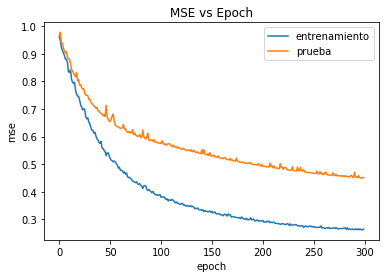

In [83]:
plot_data(history.history['loss'],history.history['val_loss'])